### About the Data
The data consists of the following columns:
- `SortType` - The algorithm used to sort the data (bubble sort, selection sort, insertion sort).
- `ArrayType` - The order the integers in the array prior to sorting.
    - `Random` - The integers in the array were in random order.
    - `Increasing` - The integers in the array were in ascending order.
    - `IncreasingAndRandom` - 90% of the integers were in ascending order while 10% were in random order.
    - `Decreasing` - The integers in the array were in descending order.
    - `Equal` - The integers in the array were all the same.
- `ArraySize` - The size of the array.
    - `10000` - The array contained 10,000 integers.
    - `25000` - The array contained 25,000 integers.
    - `50000` - The array contained 50,000 integers.
    - `100000` - The array contained 100,000 integers.
- `Test`# - The time it took in milliseconds to sort the array.
- `AverageTime` - The average of all the test times in milliseconds.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

Increase the display size of all graphs by `factor`.

In [2]:
factor = 1.2
mpl.rcParams["figure.dpi"] = mpl.rcParamsDefault["figure.dpi"] * factor

Set the color style for all displayed graphs. Run `plt.style.available` for a list of styles.

In [3]:
#plt.style.use(["dark_background"])

### Data
The data is the same as the data from the [sorting algorithms analysis](https://github.com/irisfield/sorting-algorithms-analysis) project.

In [4]:
tests = pd.read_csv("data/sort_tests.csv")

In [5]:
tests

,SortType,ArrayType,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime
0,BubbleSort,Equal,10000,2.100887,1.816844,1.734940,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819
1,BubbleSort,Equal,25000,0.344438,0.342302,0.340168,0.341084,0.273704,0.343259,0.340629,0.346424,0.286490,0.328722
2,BubbleSort,Equal,50000,0.669300,0.714362,0.750050,0.751582,0.724130,0.845181,0.480185,0.509878,0.512997,0.661962
3,BubbleSort,Equal,100000,0.983173,0.811248,0.910891,0.922530,0.944618,0.962387,0.922943,1.047562,0.937066,0.938046
4,BubbleSort,Random,10000,1423.721529,1615.646777,1636.998131,1733.617812,1699.408568,1608.589898,1640.827512,1584.911188,1805.414216,1638.792847
5,BubbleSort,Random,25000,17820.525435,14897.161279,14086.136214,12153.546143,13017.104881,16598.033997,16510.642676,15338.869148,17002.808605,15269.425375
6,BubbleSort,Random,50000,92502.936111,72313.872971,60330.164272,66429.312906,66336.374407,62790.397230,67761.572618,66051.570752,63835.811092,68705.779151
7,BubbleSort,Random,100000,267902.873662,330858.314055,351393.330513,356742.938208,381057.021634,385180.364030,374069.504284,344426.077008,371334.521629,351440.549447
8,BubbleSort,Increasing,10000,0.120689,0.142236,0.168250,0.139213,0.133302,0.125839,0.138850,0.139291,0.142248,0.138879
9,BubbleSort,Increasing,25000,0.352865,0.260573,0.353962,0.307230,0.354571,0.339063,0.341304,0.345099,0.384553,0.337691


### Classification Models
**Terminology**
- The *dependent variable* is the variable being predicted or classified.
- The *features* (or the *independent variables*) are the known variables used to predict or classify the dependent variable.
- The *confusion matrix* is an evaluation metric used to determine accuracy, sensitivity, and specificity of the model.

**Dependent Variable**
- The variable being classified for this project is the `SortType` column. Specifically, bubble sort and selection sort.
- The dependent variable will be represented by the variable `y`.

**Independent Variables**
- Other than the `SortType` column, all the remaining columns may be used as features. 
- It may be neccesary to convert qualitative data, such as the `ArrayType` columns into dummy variable before they can used as features.
- The independent variables will be presented by variable `x`.

**Algorithms**
- The classification algorithms covered in class are:
    - Decision Tree
    - Random Forest Classifiers
    - k-Nearest Neighbors for Classification

-------------------------------------------------------------------------

### Preparations

#### Drop
Since test time columns make up most of the data, to prevent the models from over-relying on the test times, drop all the test times columns.

In [6]:
print(*tests.columns, sep = ", ")

SortType, ArrayType, ArraySize, Test1, Test2, Test3, Test4, Test5, Test6, Test7, Test8, Test9, AverageTime


In [7]:
tests = tests.drop(columns = ["Test1", "Test2", "Test3", "Test4", "Test5", "Test6", "Test7", "Test8", "Test9"])
tests[:0]

,SortType,ArrayType,ArraySize,AverageTime


##### Dummy Variables
Convert qualitative columns into numerical columns.

In [8]:
tests = pd.get_dummies(tests, columns = ["ArrayType"], drop_first = True)

Display the DataFrame and make sure the dummy variables are correct. The `drop_first = True` parameter drops the first dummy variable. The dropped column is implied because if all the dummy variables for a row are zeros, then it could only be the dropped column.

In [9]:
tests[:0]

,SortType,ArraySize,AverageTime,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random


#### Filter
Filter the sort type column so that it only contains the following sort types:
- BubbleSort and SelectionSort

In [10]:
tests1 = tests[(tests["SortType"] != "InsertionSort")].copy()
cluster_map = {"BubbleSort":0, "SelectionSort":1}
tests1["SortType"] = tests1["SortType"].apply(str).map(cluster_map)

#### Data
- Store the independent variables or features as a data frame inside the variable `x`.
- Store the dependent variable as a series inside the variable `y`.

In [11]:
x = tests1.drop(columns = ["SortType"])
y = tests1["SortType"]

Make sure the data frame `x` does not contain the `SortType` column and that series `y` only contains the `SortType` column.

In [12]:
x[:0]

,ArraySize,AverageTime,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random


In [13]:
y[:0]

Series([], Name: SortType, dtype: int64)

#### Data Split
Split the data into training and testing datasets. As per convention, split into 80% training and 20% testing.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 75)

Make sure the data was split correctly.
- `x_train` and `y_train` should have the same indexes.
- `x_test` and `y_test` should have the same indexes.

In [15]:
# returns true if if all the indices match 1:1
print(x_train.index.to_list() == y_train.index.to_list())
print(x_test.index.to_list() == y_test.index.to_list())

True
True


-------------------------------------------------------------------------

### Definition
This function definition facilitates comparing two mean squared errors by computing their percent difference.

In [16]:
def show_matrix(cmatrix):
    ax = plt.gca()
    # Use Pastel2_r for pastel color soutside of diagonal line.
    ax.imshow(cmatrix, cmap = "Pastel2") # https://www.pythonpool.com/matplotlib-cmap/
    ax.xaxis.set(ticks = range(2), ticklabels = ("0", "1"))
    ax.yaxis.set(ticks = range(2), ticklabels = ("0", "1"))
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cmatrix[i, j], ha = "center", va = "center", color = "black")
    plt.xlabel("Predictions")
    plt.ylabel("Observations")

In [17]:
def evaluation_metrics(confusion_matrix):
    true_neg = confusion_matrix[0][0]
    true_pos = confusion_matrix[1][1]
    false_neg = confusion_matrix[1][0]
    false_pos= confusion_matrix[0][1]
    accuracy = (true_neg + true_pos) / (true_neg + true_pos + false_neg + false_pos)
    precision = true_pos / (true_pos + false_pos)
    sensitivity = true_pos / (true_pos + false_neg)
    specificity = true_neg / (true_neg + false_pos)
    print("   Accuracy = {:0.2f}%".format(accuracy * 100))
    print("  Precision = {:0.2f}%".format(precision * 100))
    print("Sensitivity = {:.2f}%".format(sensitivity * 100))
    print("Specificity = {:.2f}%".format(specificity * 100))

### Metric
The confusion matrices are evaluated by comparing the accuracy, precision, sensitivity, and specificity for each model.
- Accuracy refers to the frequency of correct predictions. The ratio of the true cases to all the cases.
- Precision refers to the frequency of positive events that turned out to be true (positive).
- Sensitivity refers to the ratio of correct positive events to total positive events.
- Specificity refers to the ratio of correct negative events to total negative events.

For our data, this means the following: 
- If the *observations* and *predictions* are both zero, the model correctly classified a bubble sort as a bubble sort (or true negative).
- If the *observations* is zero and the *predictions* is one, the model incorrectly classified a bubble sort as a selection sort (or false positive).
- If the *observations* is one and the *predictions* is zero, the model incorrectly classified a selection sort as a bubble sort (or false negative).
- If the *observations* and *predictions* are both one, the model correctly classified a selection sort as a selection sort (or true positive).

-------------------------------------------------------------------------

### Decision Tree

#### Parameter Search
Use a for-loop to search for the best `max_depth` for the tree using based on the confusion matrix and evaluation metrics.

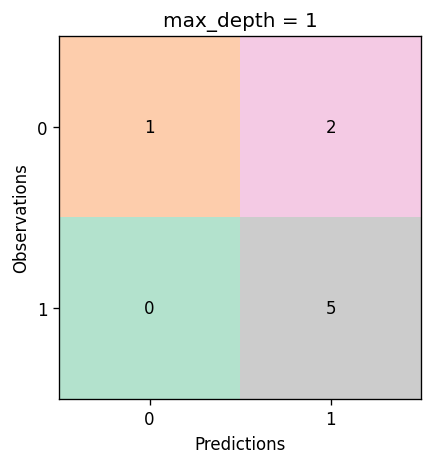

   Accuracy = 75.00%
  Precision = 71.43%
Sensitivity = 100.00%
Specificity = 33.33%


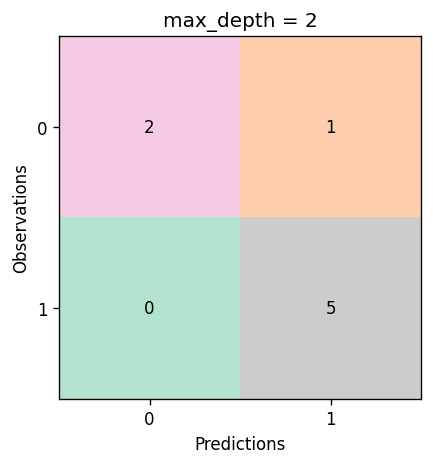

   Accuracy = 87.50%
  Precision = 83.33%
Sensitivity = 100.00%
Specificity = 66.67%


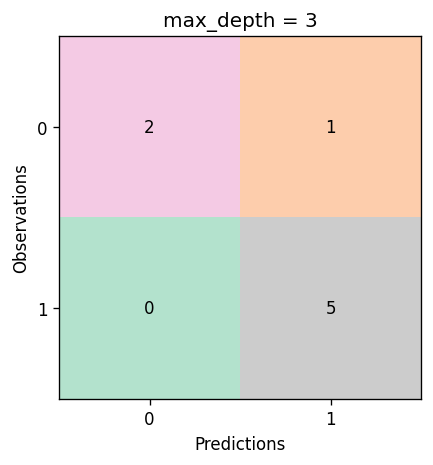

   Accuracy = 87.50%
  Precision = 83.33%
Sensitivity = 100.00%
Specificity = 66.67%


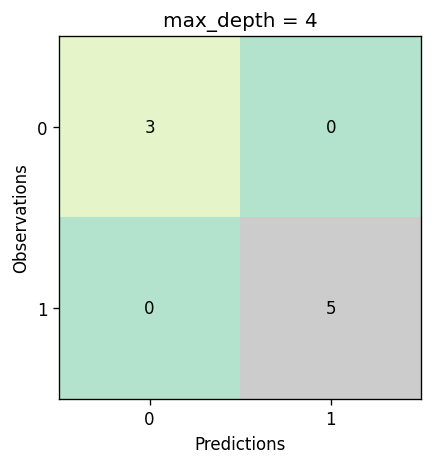

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


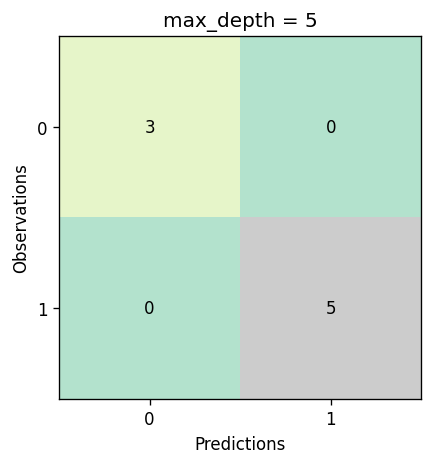

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


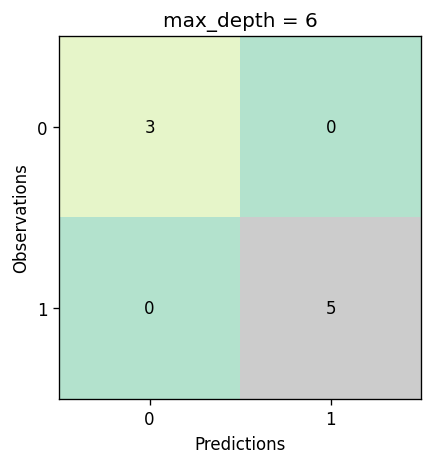

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


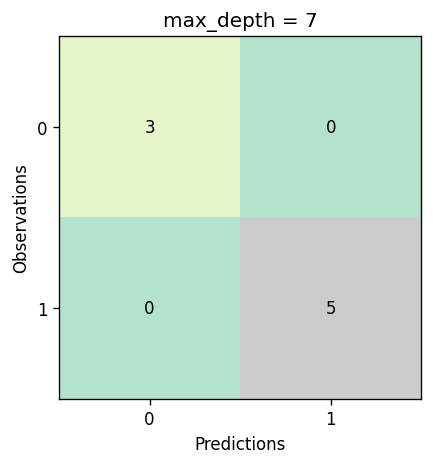

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


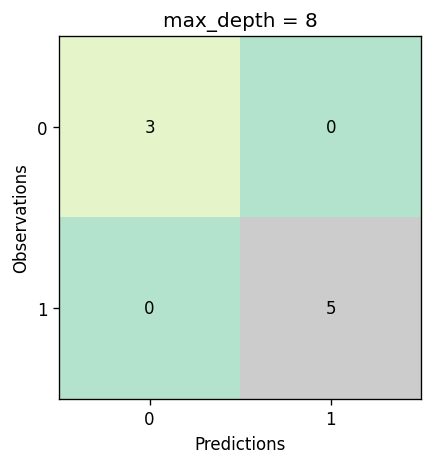

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


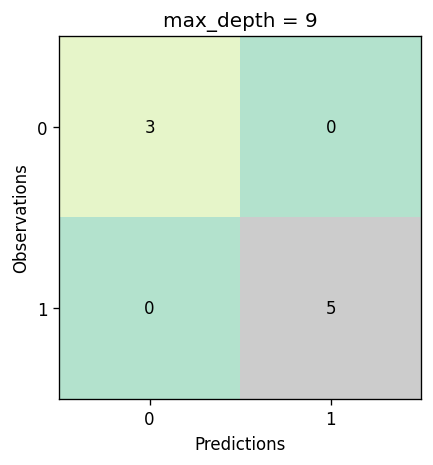

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


In [18]:
for d in range (1, 10):
    dtree = DecisionTreeClassifier(max_depth = d).fit(x_train, y_train)
    y_test_preds = dtree.predict(x_test)
    cmatrix_dtree = confusion_matrix(y_test, y_test_preds)
    show_matrix(cmatrix_dtree)
    plt.title("max_depth = {}".format(d))
    plt.show()
    evaluation_metrics(cmatrix_dtree)

### Best Depth
Based on the search results, use the best `max_depth` to create a tree model.

In [28]:
dtree_best = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train)
y_test_preds_best = dtree_best.predict(x_test)
cmatrix_dtree_best = confusion_matrix(y_test, y_test_preds_best)

In [29]:
evaluation_metrics(cmatrix_dtree_best)

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


In [27]:
len(y_train)

32

### Decision Tree Plot
Plot the decision tree.

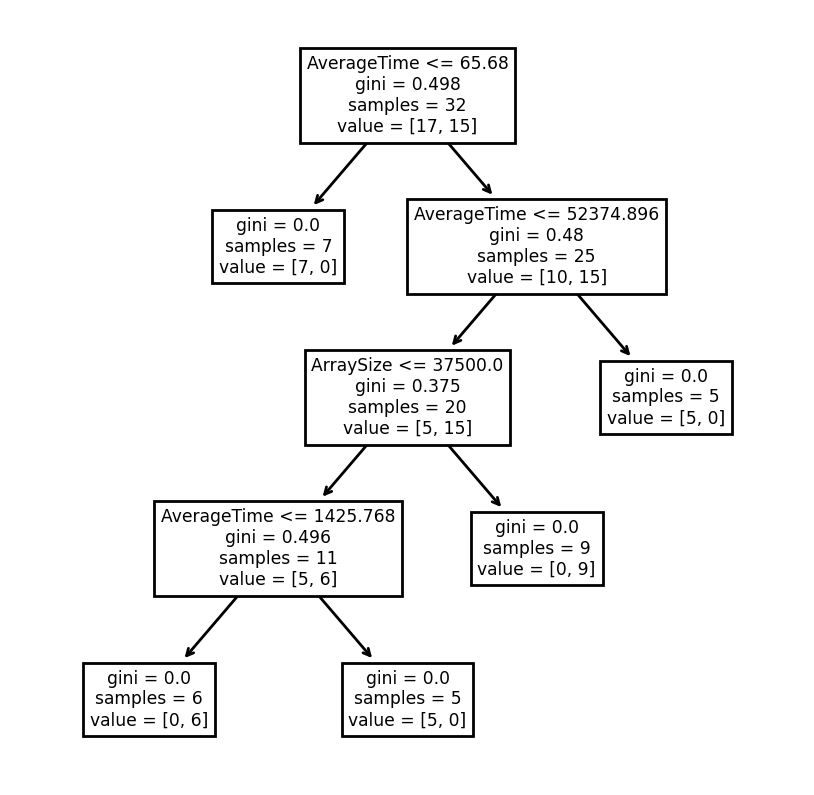

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5), dpi = 200)
plot_tree(dtree, feature_names = x.columns)
plt.show()

-------------------------------------------------------------

### k-Nearest Neighbors for Classification

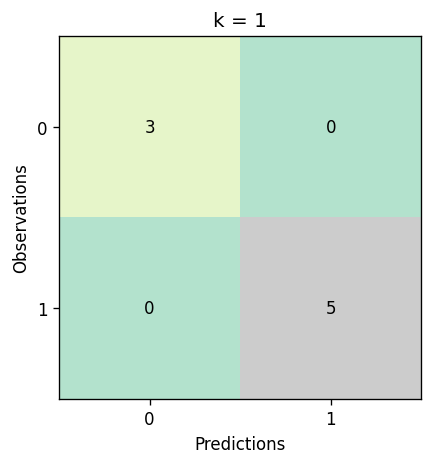

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


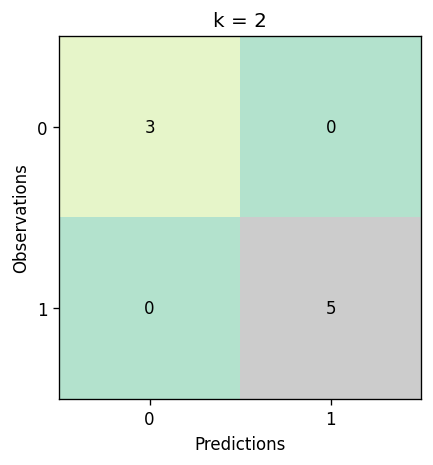

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


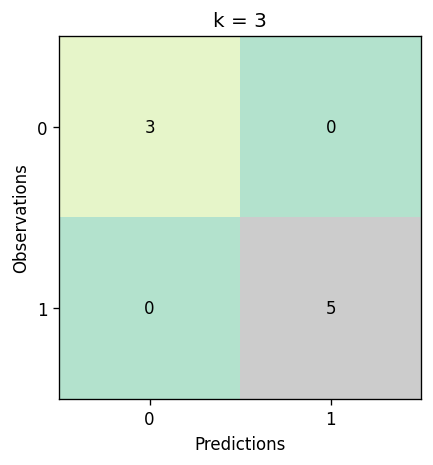

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


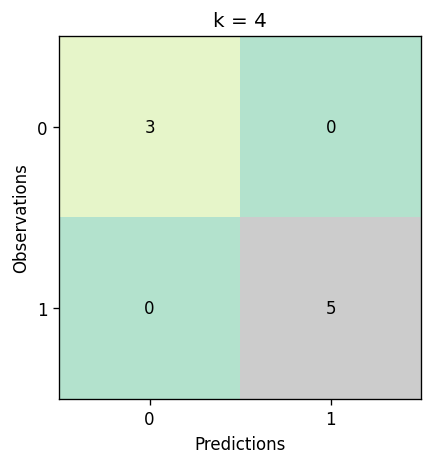

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


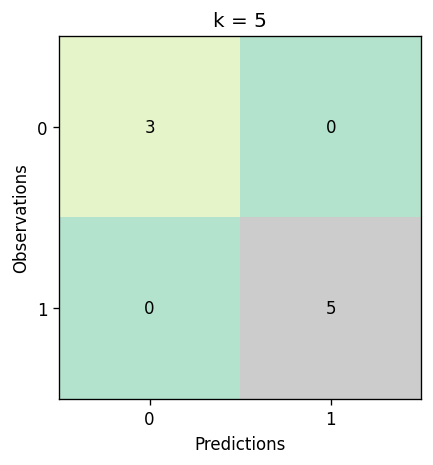

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


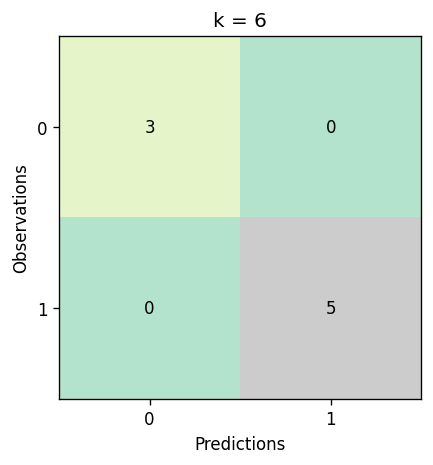

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


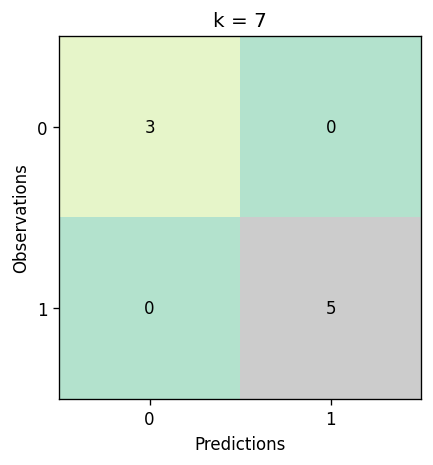

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


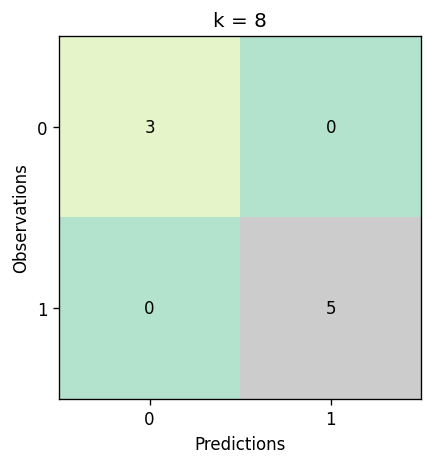

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


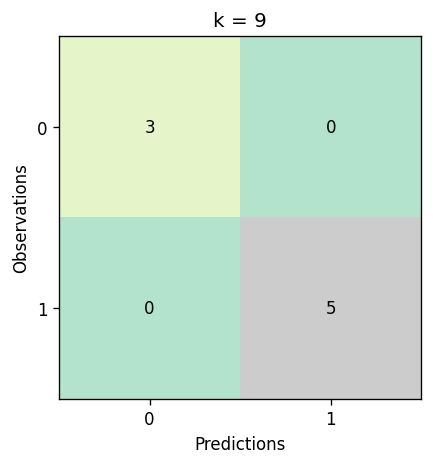

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


In [22]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)
    y_test_preds_knn = knn.predict(x_test)
    cmatrix_knn = confusion_matrix(y_test, y_test_preds_knn)
    show_matrix(cmatrix_knn)
    plt.title("k = {}".format(k))
    plt.show()
    evaluation_metrics(cmatrix_knn)

   Accuracy = 100.00%
  Precision = 100.00%
Sensitivity = 100.00%
Specificity = 100.00%


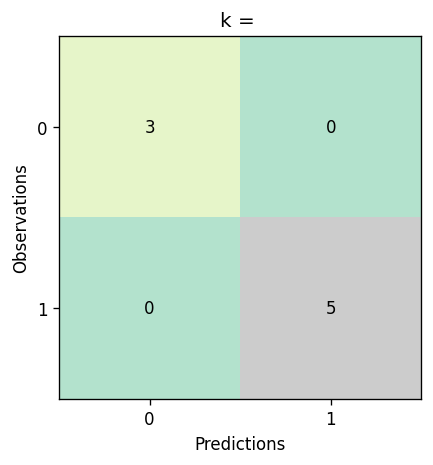

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)
y_test_preds_knn = knn.predict(x_test)
cmatrix_knn = confusion_matrix(y_test, y_test_preds_knn)
show_matrix(cmatrix_knn)
plt.title("k = ")
evaluation_metrics(cmatrix_knn)

------------------------------------------------------------------------

### Logistic regression

In [37]:
import statsmodels.formula.api as smf

In [38]:
print(*x.columns, sep = " + ")
all_features = " + ".join(map(str, x.columns))

ArraySize + AverageTime + ArrayType_Equal + ArrayType_Increasing + ArrayType_IncreasingAndRandom + ArrayType_Random


In [40]:
# formula: "y ~ x₀ + x₁ + ... + xₙ" (dependent ~ independents)
logit_model = smf.logit("SortType ~ {}".format(all_features), data = tests1).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.578910
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                    Logit                Pseudo R-squared:     0.165  
Dependent Variable:       SortType             AIC:                  60.3128
Date:                     2022-05-18 01:14     BIC:                  72.1350
No. Observations:         40                   Log-Likelihood:       -23.156
Df Model:                 6                    LL-Null:              -27.726
Df Residuals:             33                   LLR p-value:          0.16591
Converged:                1.0000               Scale:                1.0000 
No. Iterations:           8.0000                                            
----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------------
Intercept                      0.0993   0.9197  0.1080 0.9140 -1.7033 1.9020
ArraySize                      0.0000   0.0000  1.7205 0.0853 -0.0000 0.0001
AverageTime                   -0.0000   0.0000 -1.7163 0.0861 -0.0001 0.0000
ArrayType_Equal               -1.0506   1.1667 -0.9005 0.3679 -3.3372 1.2361
ArrayType_Increasing          -1.0156   1.1589 -0.8763 0.3809 -3.2869 1.2558
ArrayType_IncreasingAndRandom -0.0193   1.1632 -0.0166 0.9868 -2.2992 2.2607
ArrayType_Random               0.1926   1.1743  0.1640 0.8697 -2.1089 2.4941
============================================================================

"""

Recall that the p-value for each variable (in the column P > |z|) is the probability that we would get the coefficient in the `coef` column or one with a greater magnitude, when that coefficient is really 0 (meaning that variable does not affect the dependent variable).  Make a new logistic model with only those variables with a p-value less than 0.05, and compute the summary.

In [43]:
logit_model = smf.logit("SortType ~ ArraySize + AverageTime + ArrayType_Equal + ArrayType_Increasing", data = tests1).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.579415
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit             Pseudo R-squared:  0.164   
Dependent Variable:   SortType          AIC:               56.3532 
Date:                 2022-05-18 01:18  BIC:               64.7976 
No. Observations:     40                Log-Likelihood:    -23.177 
Df Model:             4                 LL-Null:           -27.726 
Df Residuals:         35                LLR p-value:       0.058683
Converged:            1.0000            Scale:             1.0000  
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.1530   0.6346  0.2411 0.8095 -1.0907 1.3967
ArraySize             0.0000   0.0000  1.7130 0.0867 -0.0000 0.0001
AverageTime          -0.0000   0.0000 -1.7172 0.0859 -0.0001 0.0000
ArrayType_Equal      -1.1025   0.9647 -1.1428 0.2531 -2.9933 0.7884
ArrayType_Increasing -1.0679   0.9543 -1.1191 0.2631 -2.9382 0.8024
===================================================================

"""

   Accuracy = 67.50%
  Precision = 64.00%
Sensitivity = 80.00%
Specificity = 55.00%


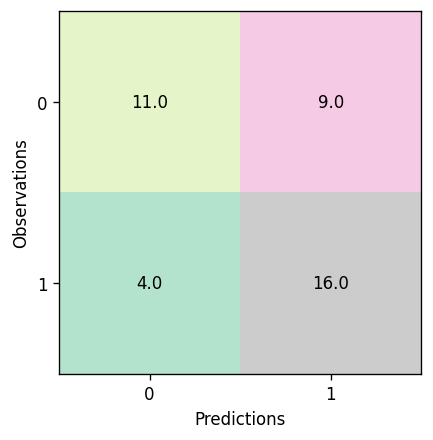

In [45]:
cmatrix_logit = logit_model.pred_table()
show_matrix(cmatrix_logit)
evaluation_metrics(cmatrix_logit)